In [8]:
from keys import FTX_API_KEY, FTX_API_SECRET
import seaborn as sns
import os
import pandas as pd
import matplotlib.pyplot as plt
from utility_classes.correlation import Correlation
from utility_classes.historical_data_processor import FTXDataProcessor
acc = FTXDataProcessor(api_key=FTX_API_KEY, api_secret=FTX_API_SECRET)
corr = Correlation(spread_folder_path='/home/harry/trading_algo/crypto_trading_researches/strategy_backtests/historical_data/all_spreads')
plt.rcParams['figure.figsize'] = [20, 10]


## Pearson's coefficient for different spreads


### get the past futures expiration dates

In [9]:
acc.get_expired_futures_dates()


expiration date: 1225 | Date December 2020
expiration date: 0925 | Date September 2020
expiration date: 0626 | Date June 2020
expiration date: 20200327 | Date March 2020
expiration date: 20191227 | Date December 2019
expiration date: 20190927 | Date September 2019
expiration date: 20190628 | Date June 2019
expiration date: 20190329 | Date March 2019


### draw the heatmap

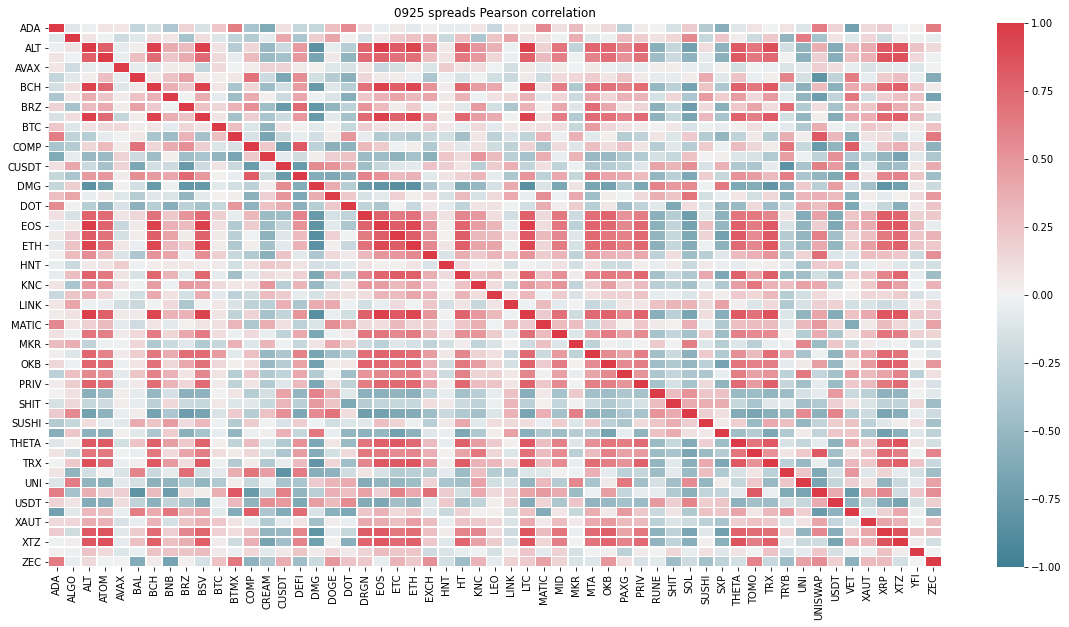

In [10]:
corr.spreads_correlation_heatmap(futures_date='0925')